# SMS_Spam_Detection

## Project Initiation

In [3]:
import pandas as pd

In [9]:
df = pd.read_csv("SMSSpamCollection",sep="\t",header=None,names=["label", "message"],encoding="latin-1")
# This Step is the most important since the data in the dataset in in txt format seperated by commas
# If the dataset is already converted into a csv File then the upper commented code works too.

In [11]:
df.head() # ---- Looking if the data is in needed format or not

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


### Pre-Processing

In [17]:
# The datset dosenot have any null values.
# The Message columns do not need to chnage their datatypes.
# The label columns need to change as we need to assign 1 as HAM and 0 as SPAM. (This is easier for the model to process as compared to transforming the words into vectors(Vectorization))
# There are only 2 classes HAM and SPAM.
## -------------------------Considering all these Facts we need to move on to cleaning the dataset befor training.----------------------------

#### Before startig the process heres what we will be doing in it:
##### - Lowercasing: Avoid treating “Uppercase” and “uppercase” as different words.
##### - Removing punctuation & numbers: This is just for noise reduction since meaasges are quite long.
##### - Stopword removal: They are just useless (holding very little semantic meaning) words so remove them.
##### - Stemming: Reduces to root form (since there are too many varients of same word, this reduces the dimensionality)
<span style="color:red">Note: We could use Lemmatization but its just slow and not necessarily better in our context but we will try it and see if it affects the overall score</span>
##### - Rejoining text: Its required for the TF-IDF part
##### - Tokenization: Breaking Sentence into words

In [21]:
import nltk

In [22]:
# NLTK is the library that will do almost all of the data preprocesing processs steps

In [23]:
data=df.copy()

In [24]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
data['label'] = data['label'].replace({'ham': 1, 'spam': 0}) #----We are replacing the label data with 1 as Ham and 0 as Spam

/var/folders/qh/h1bgsbyx7tnd_5h4rs71xvkm0000gn/T/ipykernel_24755/957923684.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['label'] = data['label'].replace({'ham': 1, 'spam': 0}) #----We are replacing the label data with 1 as Ham and 0 as Spam


In [31]:
data.head()

,label,message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
import re

In [35]:
# re (regular expressions) handles all the extra characters like @, #, $ and such signs and symbols.

In [37]:
def data_preprocessing(message):
    # lowercasing all the messages.
    message = message.lower()
    # removing anything that is not a lower cased alphabet with blank space.
    message = re.sub(r'[^a-z]', ' ', message)
    # creating boundary between words while removing the double white spaces if there are any.
    message = " ".join(message.split())
    return message


In [39]:
data['processed_message'] = data['message'].apply(data_preprocessing)


In [41]:
data[['message', 'processed_message']].head()

,message,processed_message
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...


In [44]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prashantrijal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [48]:
def data_preprocessing_1(message):
    word = message.split()
    refined_words = [stemmer.stem(w) for w in word if w not in stop_words]
    return " ".join(refined_words)

In [53]:
data['final_processed_message'] = data['processed_message'].apply(data_preprocessing_1)

In [54]:
data.head()

,label,message,processed_message,final_processed_message
0,1,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...,free entri wkli comp win fa cup final tkt st m...
3,1,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...,nah think goe usf live around though


### Tokenization

In [59]:
from nltk.tokenize import word_tokenize

# Downloading necessary resources
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prashantrijal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
def tokenize_message(message):
    # This function takes the cleaned string and breaks it into a list of words
    return word_tokenize(message)

In [63]:
data['tokens'] = data['final_processed_message'].apply(tokenize_message)

In [65]:
# Review the result
print(data[['final_processed_message', 'tokens']].head())

                             final_processed_message  \
0  go jurong point crazi avail bugi n great world...   
1                              ok lar joke wif u oni   
2  free entri wkli comp win fa cup final tkt st m...   
3                u dun say earli hor u c alreadi say   
4               nah think goe usf live around though   

                                              tokens  
0  [go, jurong, point, crazi, avail, bugi, n, gre...  
1                       [ok, lar, joke, wif, u, oni]  
2  [free, entri, wkli, comp, win, fa, cup, final,...  
3      [u, dun, say, earli, hor, u, c, alreadi, say]  
4       [nah, think, goe, usf, live, around, though]  


In [67]:
data.head()

,label,message,processed_message,final_processed_message,tokens
0,1,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go jurong point crazi avail bugi n great world...,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,1,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,"[ok, lar, joke, wif, u, oni]"
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...,free entri wkli comp win fa cup final tkt st m...,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,1,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say earli hor u c alreadi say,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,1,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...,nah think goe usf live around though,"[nah, think, goe, usf, live, around, though]"


### Vectorization

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [73]:
tfidf = TfidfVectorizer(max_features=3000)
# We limit to 3000 features to keep the model efficient and remove rare noise

In [75]:
X = tfidf.fit_transform(data['final_processed_message']).toarray()
# Transform the text into a numerical matrix (X)
# We use the final cleaned column

In [77]:
y = data['label'].values
# Extract the target labels (y)
# Assuming your label column is named 'label'

### Train Test Split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the data into Training and Testing sets (80% Train, 20% Test)

In [82]:
print(f"Feature matrix shape: {X.shape}")
print("Vectorization and Split Complete.")

Feature matrix shape: (5572, 3000)
Vectorization and Split Complete.


### Multinomial Naive Bayes

In [86]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [88]:
nb_model = MultinomialNB(alpha=1.0)
# Configured with Laplace smoothing (alpha=1.0) for the starting
nb_model.fit(X_train, y_train)

MultinomialNB()

In [90]:
nb_pred = nb_model.predict(X_test)

In [92]:
accuracy_score(y_test, nb_pred)

0.9811659192825112

In [94]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       149
           1       0.98      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

In [100]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [102]:
lr_pred = lr_model.predict(X_test)

In [104]:
accuracy_score(y_test, lr_pred)

0.9713004484304932

In [106]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       149
           1       0.97      1.00      0.98       966

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



### Support Vector Machine (SVM)

In [109]:
from sklearn.svm import LinearSVC

In [111]:
svm_model = LinearSVC(C=1.0)  # Linear SVM for text classification
svm_model.fit(X_train, y_train)

LinearSVC()

In [119]:
svm_pred = svm_model.predict(X_test)

In [121]:
accuracy_score(y_test, svm_pred)

0.9838565022421525

In [123]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       149
           1       0.98      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

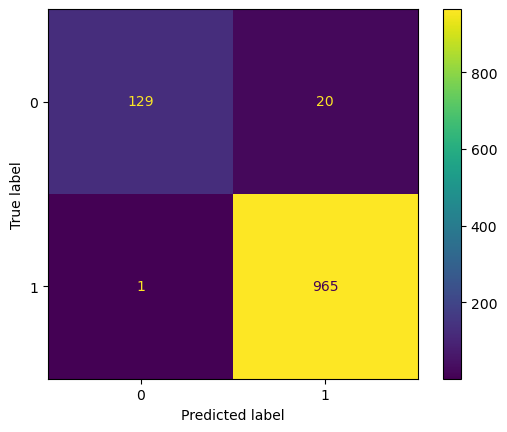

In [127]:
cm = confusion_matrix(y_test, nb_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

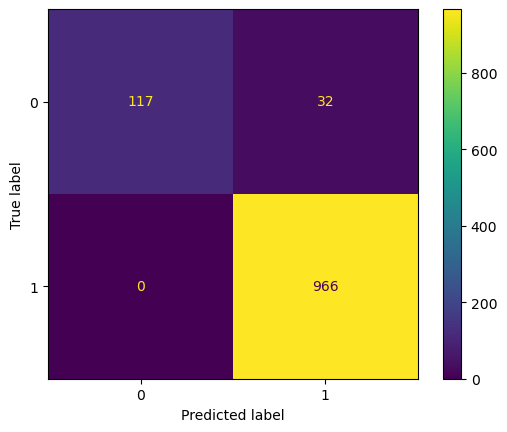

In [129]:
cm = confusion_matrix(y_test, lr_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

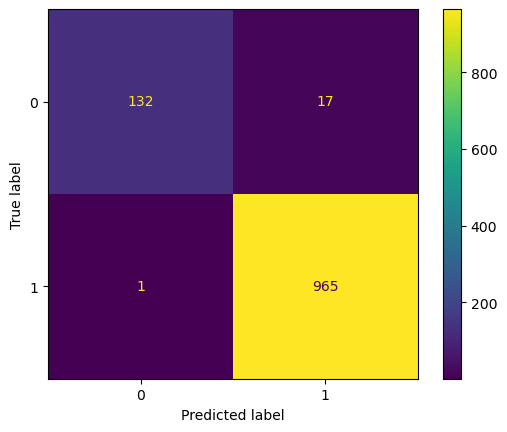

In [131]:
cm = confusion_matrix(y_test, svm_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

### Esemble Learning

In [134]:
from sklearn.ensemble import VotingClassifier

In [138]:
nb = MultinomialNB(alpha=1.0)
lr = LogisticRegression(solver='liblinear')
svm = LinearSVC()

In [140]:
ensemble_model = VotingClassifier(estimators=[('nb', nb),('lr', lr),('svm', svm)],voting='hard')

In [142]:
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('lr', LogisticRegression(solver='liblinear')),
                             ('svm', LinearSVC())])

In [148]:
ensemble_pred = ensemble_model.predict(X_test)

print("Ensemble Accuracy:", accuracy_score(y_test, ensemble_pred))
print("\nClassification Report:\n", classification_report(y_test, ensemble_pred))
models = {
    "Naive Bayes": nb_pred,
    "Logistic Regression": lr_pred,
    "SVM": svm_pred,
    "Ensemble": ensemble_pred
}

for name, pred in models.items():
    print(f"{name} Accuracy:", accuracy_score(y_test, pred))

Ensemble Accuracy: 0.979372197309417

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92       149
           1       0.98      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Naive Bayes Accuracy: 0.9811659192825112
Logistic Regression Accuracy: 0.9713004484304932
SVM Accuracy: 0.9838565022421525
Ensemble Accuracy: 0.979372197309417
